In [1]:
import cv2
import tkinter as tk
import os
from tkinter import filedialog
import matplotlib.pyplot as plt

## Зчитування,відображення,збереження картинки та її гістограми

In [2]:
def load_image(flag):
    """Функція зчитування зображення"""
    file_path = filedialog.askopenfilename()

    if not file_path:
        return None
    if not os.path.isfile(file_path):
        return None

    # Завантажуємо кольорове зображення
    return cv2.imread(file_path, flag)

In [3]:
def show_image(img):
    """Функція для відображення зображення"""
    if img is not None:
        cv2.imshow('Your loaded image', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error.Image does not downloaded.")
        


In [4]:
def save_image(img):
    """Функція для збереження зображення"""
    if img is None:
        print("Error.Image does not downloaded.")
        
    file_path = filedialog.asksaveasfilename(defaultextension=".jpeg")
    if not file_path:
        return
    
    # Запис файлу 
    cv2.imwrite(file_path, img)
    cv2.destroyAllWindows()

In [5]:
def show_histogram(img):
    """Функція відображення гістограми"""
    color = ('b', 'g', 'r')

    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
    
    plt.xlim([0, 256])
    plt.show()

## Алгоритм створення негативного зображення шляхом віднімання

In [6]:
def create_negative_image_second(img):
    """Функція перетворення картинки на негативну"""
    if img is not None:
        img_neg = 255 - img  # Інверсія кольорів
        return img_neg
    else:
        print("Error.Image does not downloaded.")

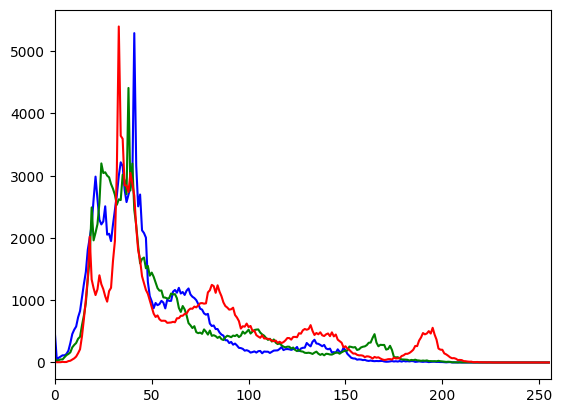

In [7]:
img = load_image(1)
show_histogram(img)

In [8]:
show_image(img)

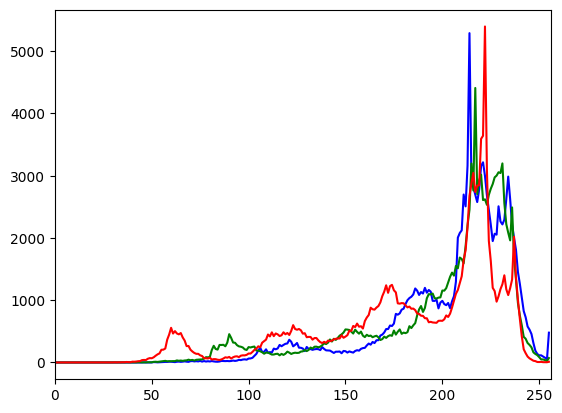

In [9]:
negative_img = create_negative_image_second(img)
show_histogram(negative_img)

In [10]:
show_image(negative_img)

In [11]:
save_image(negative_img)

## Алгоритм створення негативного зображення шляхом перебору масиву пікселів та його інвертування

In [12]:
def create_negative_image_first(img):
    """Функція перетворення картинки на негативну"""
    if img is None:
        print("Error.Image does not downloaded.")
        
    img = img.copy()
    # Отримати висоту та ширину зображення
    height, width, _ = img.shape
    for i in range(height):
        for j in range(width):
            # Отримати значення пікселя
            pixel = img[i, j]
            # Відніміть кожен канал, віднявши його від 255
            # Перший індекс містить червоний піксель
            pixel[0] = 255 - pixel[0]
            # 2-й індекс містить зелений піксель
            pixel[1] = 255 - pixel[1]
            # 3-й індекс містить синій піксель
            pixel[2] = 255 - pixel[2]
            # Зберегти нові значення у пікселі
            img[i, j] = pixel

    return img


def show_image_first(img):
    """Функція відображення картинки у matplotlib"""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [13]:
negative_img_task2 = create_negative_image_first(img)

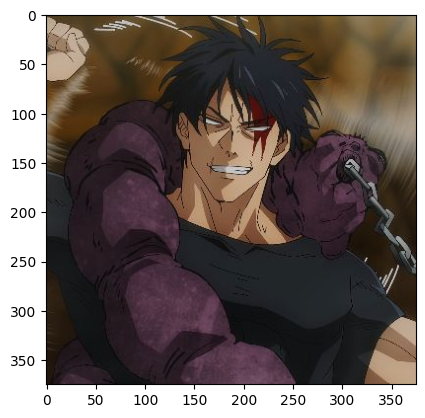

In [14]:
show_image_first(img)

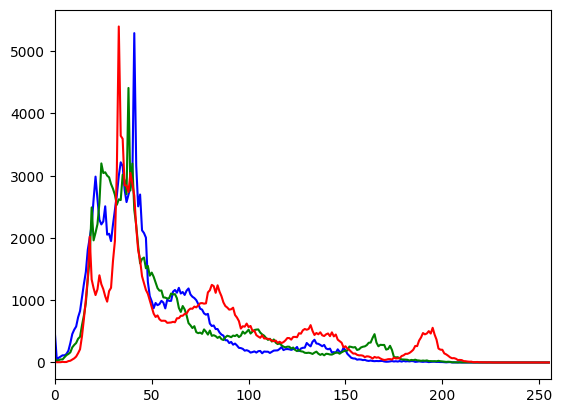

In [15]:
show_histogram(img)

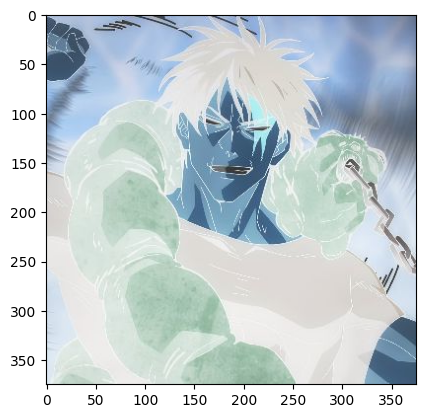

In [16]:
show_image_first(negative_img_task2)

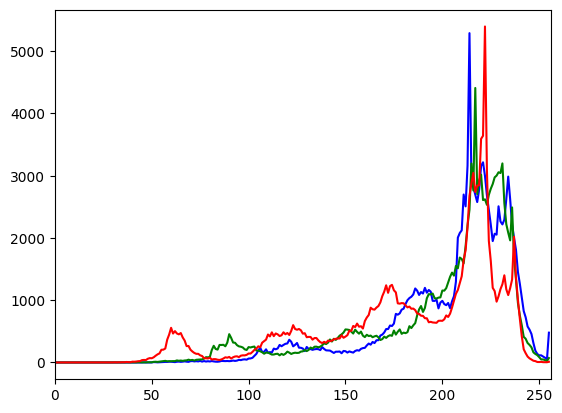

In [17]:
show_histogram(negative_img_task2)

In [18]:
save_image(negative_img_task2)